# Determining $\Sigma_{10}$, $\Sigma_{10,\text{flux selected}}$ , $\Sigma_{20}$, $\Sigma_{20,\text{flux selected}}$ for `DESIJ2158+0257`

Author(s): Fahim Rajit Hossain, Anowar Shajib, S M Rafee Adnan

### Calculating $\Sigma_{10}$


In the context of the paper "[The Sloan Lens ACS Survey. VIII. The Relation between Environment and Internal Structure of Early-Type Galaxies](https://arxiv.org/pdf/0806.1056.pdf)," the projected number density of galaxies inside the tenth nearest neighbor ($\Sigma_{10}$) refers to a measure of the local galaxy density surrounding a target early-type galaxy.

To explain this concept from the paper, we need to understand how the authors calculated $\Sigma_{10}$ and its significance in studying the relationship between galaxy environment and the internal structure of early-type galaxies.

1. Calculation of $\Sigma_{10}$:
In the paper, the authors studied a sample of early-type galaxies with measured gravitational lensing effects. For each target early-type galaxy, they identified its ten nearest neighbor galaxies based on their projected angular distances. The projected angular distance is the angular separation between the target galaxy and its neighbors as seen from our perspective on Earth.

$\Sigma_{10}$ is then calculated as the number of galaxies (including the target galaxy itself) within the combined area covered by the ten nearest neighbors, divided by the total area of that region. In other words, $\Sigma_{10}$ represents the number density of galaxies in the vicinity of the target galaxy, considering the influence of its ten closest neighbors.

2. Significance of $\Sigma_{10}$:
The projected number density $\Sigma_{10}$ is a crucial parameter to study the local galaxy environment around each early-type galaxy in the sample. It provides a measure of the galaxy density on small scales, capturing the immediate gravitational influences of nearby galaxies on the target galaxy.

By analyzing the correlation between $\Sigma_{10}$ and the internal properties of early-type galaxies (such as their effective radii and velocity dispersions), the authors can explore how the local galaxy environment affects the structure and evolution of early-type galaxies. High $\Sigma_{10}$ values imply dense environments with strong gravitational interactions, which might have implications for the growth and assembly history of the early-type galaxies.

In summary, $\Sigma_{10}$ quantifies the local galaxy density surrounding each target early-type galaxy in the sample. It plays a crucial role in understanding the impact of the immediate environment on the internal properties and evolution of these galaxies, providing insights into the complex interplay between galaxy environment and galaxy structure.

Finally calculations can be made by
$$\Sigma_{10} = 10/(\pi R_{10}^2)$$

## Load data

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import yaml
from astropy.io import fits
from astropy.stats import SigmaClip
from astropy.visualization import simple_norm
from astropy.wcs import WCS
from google.colab import drive
from photutils.background import Background2D, MedianBackground
from photutils.segmentation import (SourceCatalog, SourceFinder,
                                    deblend_sources, detect_sources)

!pip install photutils






drive.mount("/content/drive")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 7.2 MB/s eta 0:00:00
Mounted at /content/drive


## Load Data

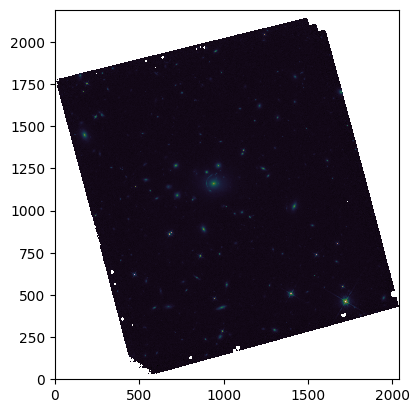

In [2]:
data, header = fits.getdata(
    "/content/drive/MyDrive/BDLensing/DESI-329.6820+02.9584_F140W_drz_sci.fits",
    header=True,
)

plt.imshow(np.log10(data), origin="lower", cmap="cubehelix", interpolation="nearest")

## Background estimation

<ipython-input-3-1b7fe038732e>:6: RuntimeWarning: invalid value encountered in log10
  plt.imshow(np.log10(data - bkg.background), origin='lower',


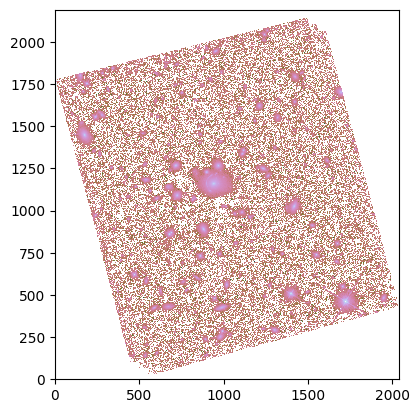

In [3]:
sigma_clip = SigmaClip(sigma=3.0)
bkg_estimator = MedianBackground()
bkg = Background2D(
    data,
    (50, 50),
    filter_size=(3, 3),
    sigma_clip=sigma_clip,
    bkg_estimator=bkg_estimator,
)

plt.imshow(
    np.log10(data - bkg.background),
    origin="lower",
    cmap="cubehelix",
    interpolation="nearest",
)

## Aperture photometry

In [4]:
np.median(bkg.background), np.median(bkg.background_rms)

bkg_subtracted_data = data - bkg.background

# Source detection and segmentation
threshold = 4 * bkg.background_rms  # changed to 4 instead of 5 to accomadate an object
# near 4 o'clock

segment_map = detect_sources(bkg_subtracted_data, threshold, npixels=10)
segm_deblend = deblend_sources(
    bkg_subtracted_data,
    segment_map,
    npixels=8,
    nlevels=32,
    contrast=0.001,
    progress_bar=False,
)

# Source catalog creation

finder = SourceFinder(npixels=10, progress_bar=False)
segment_map = finder(bkg_subtracted_data, threshold)

print(segment_map)

cat = SourceCatalog(bkg_subtracted_data, segm_deblend)
print(cat)

<photutils.segmentation.core.SegmentationImage>
shape: (2192, 2042)
nlabels: 637
labels: [  1   2   3   4   5 ... 633 634 635 636 637]
<photutils.segmentation.catalog.SourceCatalog>
Length: 657
labels: [  1   2   3   4   5 ... 653 654 655 656 657]


In [5]:
# Set axis limits
set_x_lim1, set_x_lim2 = 800 - 300, 1100 + 300
set_y_lim1, set_y_lim2 = 1050 - 300, 1300 + 300

<ipython-input-6-a6aca321547e>:7: RuntimeWarning: invalid value encountered in log10
  np.log10(data - bkg.background), origin="lower", cmap="cubehelix", vmin=-4, vmax=2


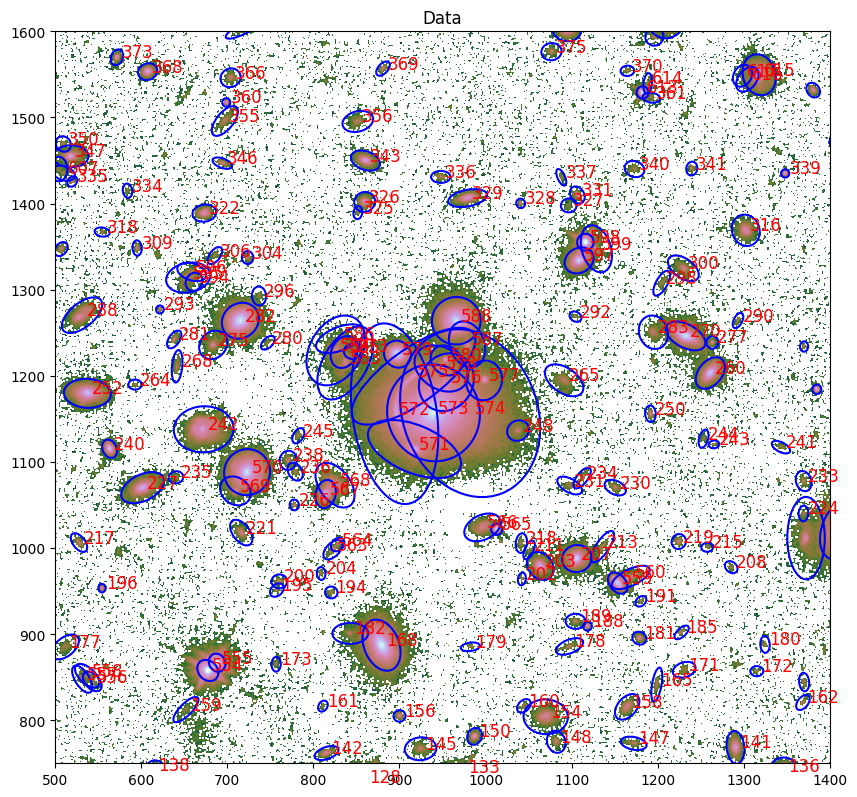

In [6]:
# Plotting

norm = simple_norm(data, "sqrt")

fig, ax1 = plt.subplots(1, 1, figsize=(10, 12.5))
ax1.imshow(
    np.log10(data - bkg.background), origin="lower", cmap="cubehelix", vmin=-4, vmax=2
)
ax1.set_title("Data")

cat.plot_kron_apertures(ax=ax1, color="blue", lw=1.5)

for i in range(len(cat)):
    if (
        np.abs(cat.xcentroid[i] - cat.xcentroid[573]) < 430
        and np.abs(cat.ycentroid[i] - cat.ycentroid[573]) < 430
    ):
        ax1.text(
            cat.xcentroid[i] + 5,
            cat.ycentroid[i],
            f"{i}",
            c="r",
            fontsize=12
            # transform=ax1.transAxes
        )

# cat.plot_kron_apertures(ax=ax2, color='white', lw=1.5);

ax1.set_xlim(set_x_lim1, set_x_lim2)
ax1.set_ylim(set_y_lim1, set_y_lim2)

# hide all text outside of the axes
ax1.set_clip_on(True)
ax1.set_clip_box(ax1.bbox)

## Finding Central Lens

<ipython-input-7-61c6795694d9>:11: RuntimeWarning: invalid value encountered in log10
  np.log10(data - bkg.background),


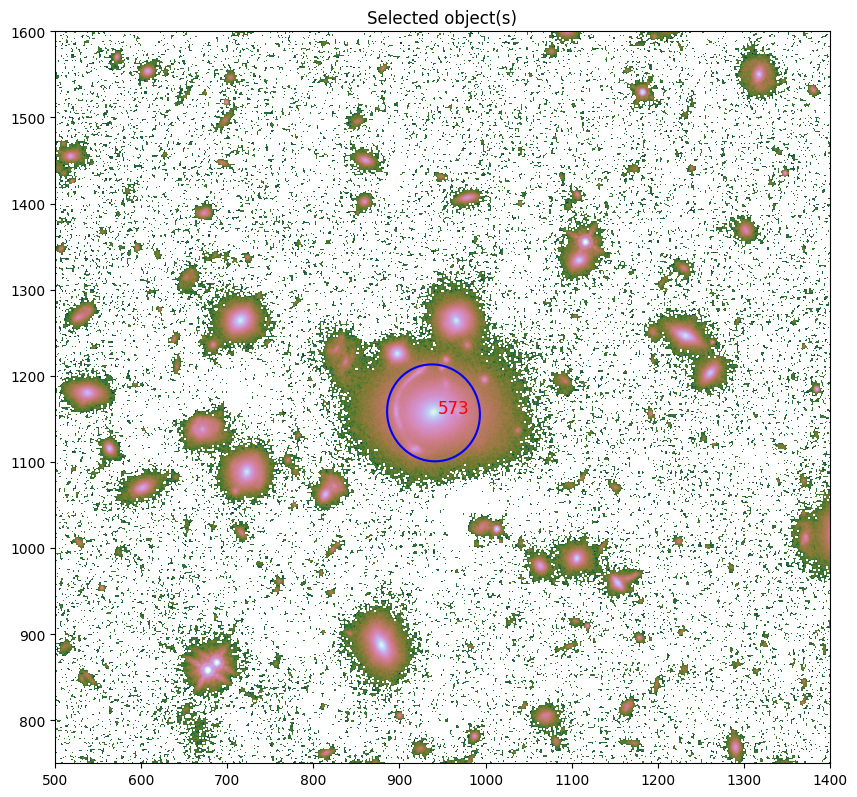

In [7]:
# Defining a function for labeling only selected objects


def label_selected_objects(selected_ids):
    # Background subtraction
    data - bkg.background

    # Plotting
    simple_norm(data, "sqrt")
    fig, ax1 = plt.subplots(1, 1, figsize=(10, 12.5))
    ax1.imshow(
        np.log10(data - bkg.background),
        origin="lower",
        cmap="cubehelix",
        vmin=-4,
        vmax=2,
    )
    ax1.set_title("Selected object(s)")

    # Plot Kron apertures and label selected objects
    for obj_id in selected_ids:
        labels = [obj_id + 1]
        cat_subset = cat.get_labels(labels)
        cat_subset.plot_kron_apertures(ax=ax1, color="blue", lw=1.5)

        ax1.text(
            cat.xcentroid[obj_id] + 5,
            cat.ycentroid[obj_id],
            f"{obj_id}",
            c="r",
            fontsize=12
            # transform=ax1.transAxes
        )

    # Set axis limits
    ax1.set_xlim(set_x_lim1, set_x_lim2)
    ax1.set_ylim(set_y_lim1, set_y_lim2)

    # Hide text outside of the axes
    ax1.set_clip_on(True)
    ax1.set_clip_box(ax1.bbox)

    # Show the plot
    plt.show()


# Guessing the lens galaxy
id_central = [573]

# Calling the function label id_central
label_selected_objects(id_central)

## Close Galaxies, Distance, Flux

In [8]:
tbl = cat.to_table()
tbl["xcentroid"].info.format = ".2f"  # optional format
tbl["ycentroid"].info.format = ".2f"
tbl["kron_flux"].info.format = ".2f"

## Creating List of neighbouring Galaxies

In [9]:
# All close galaxies

x0 = tbl["xcentroid"].value[id_central]
y0 = tbl["ycentroid"].value[id_central]
f0 = tbl["kron_flux"].value[id_central]

close_galaxies_all = []
dist_galaxies_all = []
flux_galaxies_all = []
axis_ratios_all = []

for i in range(len(tbl)):
    if i == segment_map.nlabels:
        continue
    x = tbl["xcentroid"].value[i]
    y = tbl["ycentroid"].value[i]
    f = tbl["kron_flux"].value[i]
    if np.sqrt((x - x0) ** 2 + (y - y0) ** 2) < 25 / 0.08:
        close_galaxies_all.append(i)
        flux_galaxies_all.append(f)
        dist_galaxies_all.append(np.sqrt((x - x0) ** 2 + (y - y0) ** 2))
        axis_ratios_all.append(np.sqrt(1 - tbl[i]["eccentricity"].value ** 2))

print(
    "Number of all close galaxies within 25 arcsecond radius:", len(close_galaxies_all)
)
print("Close galaxies:", (close_galaxies_all))

Number of all close galaxies within 25 arcsecond radius: 77
Close galaxies: [168, 179, 182, 188, 189, 194, 195, 200, 202, 203, 204, 207, 211, 213, 218, 221, 226, 230, 231, 234, 235, 236, 238, 242, 245, 248, 250, 265, 268, 270, 273, 275, 280, 282, 283, 292, 296, 298, 304, 325, 326, 327, 328, 329, 331, 336, 337, 343, 559, 560, 563, 564, 565, 566, 567, 568, 569, 570, 571, 572, 573, 574, 575, 576, 577, 578, 579, 580, 583, 584, 585, 586, 587, 588, 597, 598, 599]


In [10]:
# Close galaxies excluding sources lower than 1% of the central deflector

x0 = tbl["xcentroid"].value[id_central]
y0 = tbl["ycentroid"].value[id_central]
f0 = tbl["kron_flux"].value[id_central]

close_galaxies_1 = []
dist_galaxies_1 = []
flux_galaxies_1 = []
axis_ratios_1 = []

for i in range(len(tbl)):
    if i == segment_map.nlabels:
        continue
    x = tbl["xcentroid"].value[i]
    y = tbl["ycentroid"].value[i]
    f = tbl["kron_flux"].value[i]
    if (np.sqrt((x - x0) ** 2 + (y - y0) ** 2) < 25 / 0.08) & (f > f0 * 0.01):
        close_galaxies_1.append(i)
        flux_galaxies_1.append(f)
        dist_galaxies_1.append(np.sqrt((x - x0) ** 2 + (y - y0) ** 2))
        axis_ratios_1.append(np.sqrt(1 - tbl[i]["eccentricity"].value ** 2))
print(
    "Number of close galaxies excluding dim sources within 25 arcsecond radius:",
    len(close_galaxies_1),
)

print("Close galaxies_1_percent_flux:", (close_galaxies_1))

Number of close galaxies excluding dim sources within 25 arcsecond radius: 29
Close galaxies_1_percent_flux: [168, 203, 207, 242, 270, 282, 329, 343, 559, 565, 567, 568, 570, 571, 572, 573, 574, 575, 576, 577, 578, 579, 580, 583, 584, 587, 588, 597, 598]


## Pixel to Arcsec

In [11]:
def distance_arcsec(pixel_distance):
    """
    Convert distance from unit of pixels into arcsec unit.
    :param pixel_distance: distance in unit of pixels
    :return: distance in arcsec unit
    """
    wcs = WCS(header)

    # Get the pixel scale in degrees per pixel
    pix_scale_deg = abs(wcs.wcs.cd[0, 0])

    # Convert pixel scale to arcseconds
    pix_scale_arcsec = pix_scale_deg * 3600

    dist_arcsec = pixel_distance * pix_scale_arcsec

    return dist_arcsec

## Identify the unwanted objects

<ipython-input-7-61c6795694d9>:11: RuntimeWarning: invalid value encountered in log10
  np.log10(data - bkg.background),


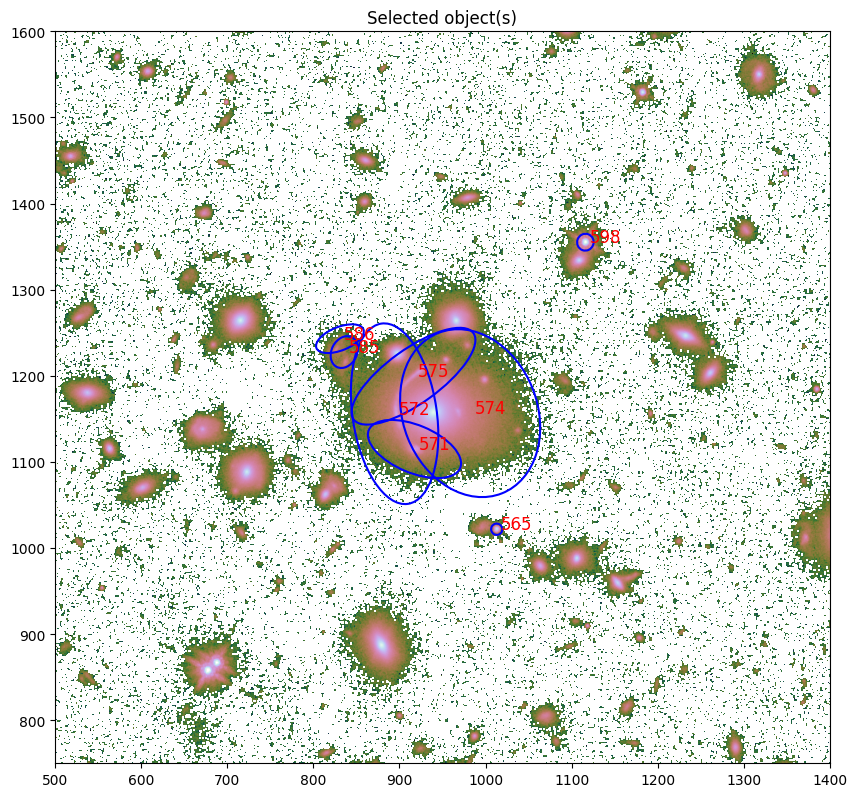

In [17]:
selected_object_ids = [571, 575, 574, 572, 565, 598, 586, 585]
label_selected_objects(selected_object_ids)

## Removing the unwanted objects from the neighboring galaxy list

In [28]:
# All close galaxies

# lens galaxy: 573
# ARC objects: 571, 575, 574, 572, 576
# stars: 565, 598
# unnessery blob: 586, 585

remove_list = [573, 571, 575, 574, 572, 565, 586, 585]

df_all = pd.DataFrame({"Distance(pixels)": dist_galaxies_all})

df_all.set_index(pd.Index(close_galaxies_all), inplace=True)

df_all["Distance(arcsec)"] = distance_arcsec(df_all["Distance(pixels)"])
df_all["Flux"] = flux_galaxies_all
df_all["Axis Ratio"] = axis_ratios_all

# Sort the DataFrame based on 'Distance'
df_all_sorted = df_all.sort_values(by="Distance(pixels)")

# Exclude unwanted sources
df_all_sys_removed = df_all_sorted.drop(remove_list)

# first 20 galaxies
df_all_20 = df_all_sys_removed.iloc[:20]

print(df_all_20)

         Distance(pixels)      Distance(arcsec)         Flux  Axis Ratio
576  [38.638989031657445]  [3.0911191225325645]   261.659456    0.872714
578   [52.34070001618002]    [4.18725600129436]   195.524462    0.714695
580   [62.66370215557757]   [5.013096172446155]    91.798200    0.842346
577   [69.77262764649824]  [5.5818102117198025]   148.154022    0.895348
579   [80.00604909794129]   [6.400483927835238]   768.482624    0.919579
587   [88.62109235059742]  [7.0896873880477225]   102.278409    0.727437
248   [100.3219299357186]   [8.025754394857408]    29.288258    0.887915
588  [110.19974514309146]    [8.81597961144723]  1355.600161    0.971529
583   [117.6317532406946]   [9.410540259255473]   135.938958    0.540443
273  [118.04667279501497]   [9.443733823601104]    11.492022    0.871297
584   [134.6648252600329]  [10.773186020802523]   118.374582    0.690449
568   [141.9025598583083]  [11.352204788664551]   106.424219    0.605437
566  [144.66287388462618]  [11.573029910769979]    

In [29]:
# Excluding galaxies lower than 1% of the central deflector

# lens galaxy: 573
# ARC objects: 571, 575, 574, 572
# stars: 565, 598
# unnessery blob: 586, 585

remove_list_1 = [573, 571, 575, 574, 572, 576, 565, 598]

df_1 = pd.DataFrame({"Distance(pixels)": dist_galaxies_1})
df_1.set_index(pd.Index(close_galaxies_1), inplace=True)

df_1["Distance(arcsec)"] = distance_arcsec(df_1["Distance(pixels)"])
df_1["Flux"] = flux_galaxies_1
df_1["Axis Ratios"] = axis_ratios_1

# Sort the DataFrame based on 'Distance'
df_1_sorted = df_1.sort_values(by="Distance(pixels)")

# Exclude the lensing system members
df_1_sys_removed = df_1_sorted.drop(remove_list_1)

# first 20 galaxies
df_1_20 = df_1_sys_removed.iloc[:20]

print(df_1_20)

         Distance(pixels)      Distance(arcsec)         Flux  Axis Ratios
578   [52.34070001618002]    [4.18725600129436]   195.524462     0.714695
580   [62.66370215557757]   [5.013096172446155]    91.798200     0.842346
577   [69.77262764649824]  [5.5818102117198025]   148.154022     0.895348
579   [80.00604909794129]   [6.400483927835238]   768.482624     0.919579
587   [88.62109235059742]  [7.0896873880477225]   102.278409     0.727437
588  [110.19974514309146]    [8.81597961144723]  1355.600161     0.971529
583   [117.6317532406946]   [9.410540259255473]   135.938958     0.540443
584   [134.6648252600329]  [10.773186020802523]   118.374582     0.690449
568   [141.9025598583083]  [11.352204788664551]   106.424219     0.605437
567  [156.75888265663244]   [12.54071061253047]   205.175306     0.696584
203   [216.7259947919115]  [17.338079583352744]   124.207424     0.787064
570  [227.17749521506727]    [18.1741996172052]  1227.996974     0.974966
207  [237.33753108820778]  [18.9870024

In [30]:
set_x_lim1, set_x_lim2 = 800 - 200, 1100 + 200
set_y_lim1, set_y_lim2 = 1050 - 200, 1300 + 200

## Calculating $\Sigma_{10}$, $\Sigma_{10,\text{flux selected}}$ , $\Sigma_{20}$, $\Sigma_{20,\text{flux selected}}$ and the corresponding radii

In [31]:
R_10_all = df_all_20.iloc[9, df_all_20.columns.get_loc("Distance(arcsec)")]
R_20_all = df_all_20.iloc[19, df_all_20.columns.get_loc("Distance(arcsec)")]
Sigma_10_all = 10 / (np.pi * R_10_all**2)
Sigma_20_all = 20 / (np.pi * R_20_all**2)


R_10_1 = df_1_20.iloc[9, df_1_20.columns.get_loc("Distance(arcsec)")]
R_20_1 = df_1_20.iloc[19, df_1_20.columns.get_loc("Distance(arcsec)")]
Sigma_10_1 = 10 / (np.pi * R_10_1**2)
Sigma_20_1 = 20 / (np.pi * R_20_1**2)

print("")
print("FOR All SOURCES")
print("R 10:", R_10_all)
print("R 20:", R_20_all)
print("Sigma 10:", Sigma_10_all)
print("Sigma 20:", Sigma_20_all)

print("")
print("EXCLUDING DIM SOURCES")
print("R 10:", R_10_1)
print("R 20:", R_20_1)
print("Sigma 10:", Sigma_10_1)
print("Sigma 20:", Sigma_20_1)


FOR All SOURCES
R 10: [9.44373382]
R 20: [14.59538629]
Sigma 10: [0.03569132]
Sigma 20: [0.0298847]

EXCLUDING DIM SOURCES
R 10: [12.54071061]
R 20: [24.27191073]
Sigma 10: [0.02023978]
Sigma 20: [0.01080618]


## Visualization

<ipython-input-32-e75b44a30cd4>:17: RuntimeWarning: invalid value encountered in log10
  np.log10(data - bkg.background), origin="lower", cmap="cubehelix", vmin=-4, vmax=2
<ipython-input-32-e75b44a30cd4>:20: RuntimeWarning: invalid value encountered in log10
  np.log10(data - bkg.background), origin="lower", cmap="cubehelix", vmin=-4, vmax=2
<ipython-input-32-e75b44a30cd4>:23: RuntimeWarning: invalid value encountered in log10
  np.log10(data - bkg.background), origin="lower", cmap="cubehelix", vmin=-4, vmax=2
<ipython-input-32-e75b44a30cd4>:26: RuntimeWarning: invalid value encountered in log10
  np.log10(data - bkg.background), origin="lower", cmap="cubehelix", vmin=-4, vmax=2


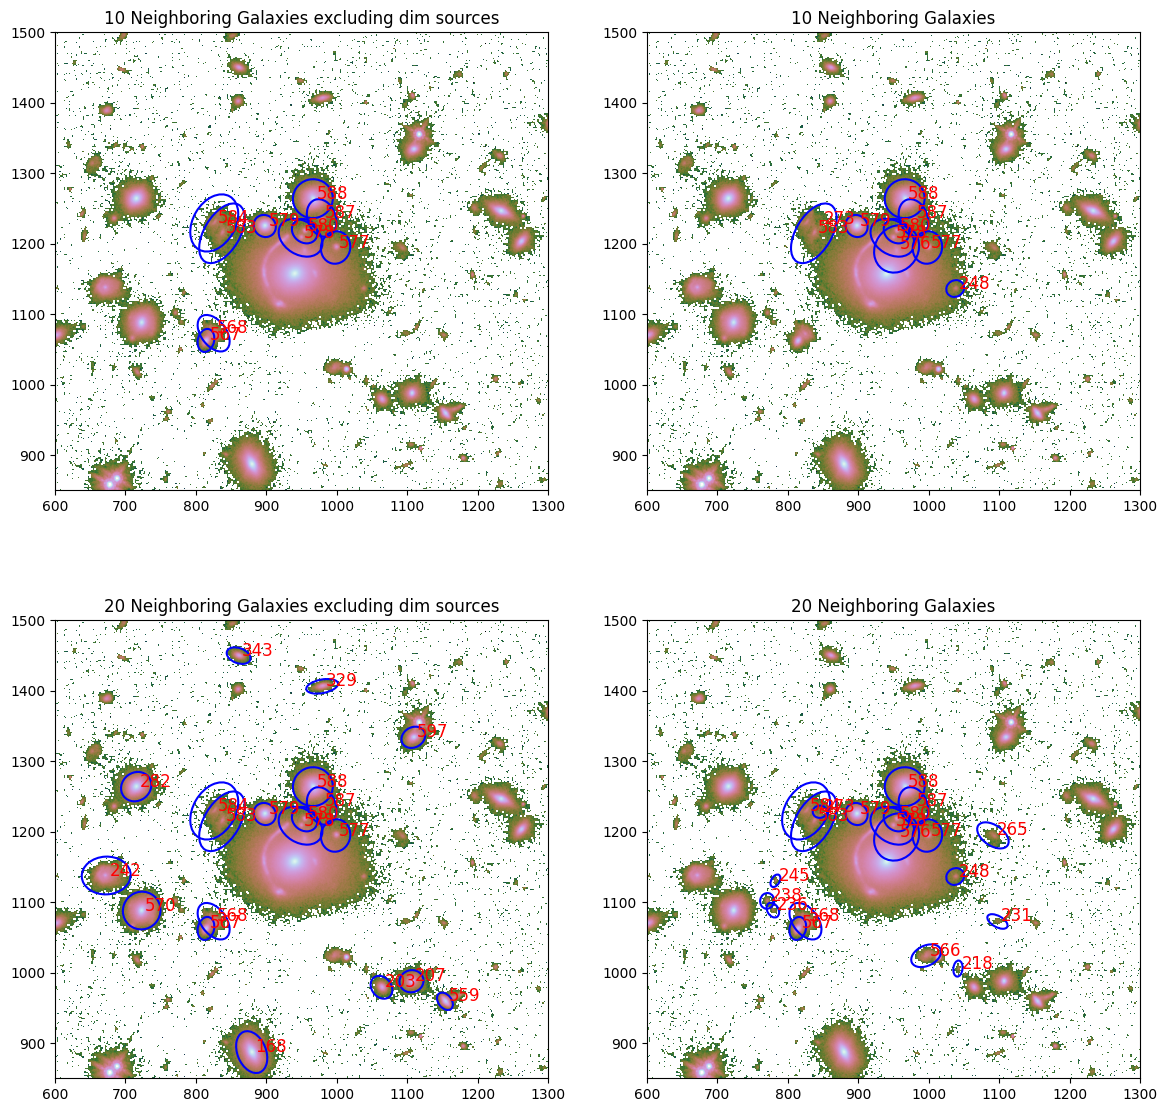

In [32]:
close_ids_all = list(df_all_20.index.values)
close_ids_all_10 = close_ids_all[:10]

updated_close_ids_all = [s + 1 for s in close_ids_all]
updated_close_ids_all_10 = updated_close_ids_all[:9]

close_ids_1 = list(df_1_20.index.values)
close_ids_1_10 = close_ids_1[:10]

updated_close_ids_1 = [s + 1 for s in close_ids_1]
updated_close_ids_1_10 = updated_close_ids_1[:10]

norm = simple_norm(data, "sqrt")
fig, axs = plt.subplots(2, 2, figsize=(14, 14))  # , figsize=(10, 12.5)

axs[0, 0].imshow(
    np.log10(data - bkg.background), origin="lower", cmap="cubehelix", vmin=-4, vmax=2
)
axs[0, 1].imshow(
    np.log10(data - bkg.background), origin="lower", cmap="cubehelix", vmin=-4, vmax=2
)
axs[1, 0].imshow(
    np.log10(data - bkg.background), origin="lower", cmap="cubehelix", vmin=-4, vmax=2
)
axs[1, 1].imshow(
    np.log10(data - bkg.background), origin="lower", cmap="cubehelix", vmin=-4, vmax=2
)

cat_subset_1_10 = cat.get_labels(updated_close_ids_1_10)
cat_subset_1_10.plot_kron_apertures(ax=axs[0, 0], color="blue", lw=1.5)

cat_subset_all_10 = cat.get_labels(updated_close_ids_all_10)
cat_subset_all_10.plot_kron_apertures(ax=axs[0, 1], color="blue", lw=1.5)

cat_subset_all = cat.get_labels(updated_close_ids_1)
cat_subset_all.plot_kron_apertures(ax=axs[1, 0], color="blue", lw=1.5)

cat_subset_1 = cat.get_labels(updated_close_ids_all)
cat_subset_1.plot_kron_apertures(ax=axs[1, 1], color="blue", lw=1.5)

axs[0, 0].set_title("10 Neighboring Galaxies excluding dim sources")
axs[0, 1].set_title("10 Neighboring Galaxies")
axs[1, 0].set_title("20 Neighboring Galaxies excluding dim sources")
axs[1, 1].set_title("20 Neighboring Galaxies")

for i in close_ids_1_10:
    axs[0, 0].text(cat.xcentroid[i] + 5, cat.ycentroid[i], f"{i}", c="r", fontsize=12)

for i in close_ids_all_10:
    axs[0, 1].text(cat.xcentroid[i] + 5, cat.ycentroid[i], f"{i}", c="r", fontsize=12)

for i in close_ids_1:
    axs[1, 0].text(cat.xcentroid[i] + 5, cat.ycentroid[i], f"{i}", c="r", fontsize=12)

for i in close_ids_all:
    axs[1, 1].text(cat.xcentroid[i] + 5, cat.ycentroid[i], f"{i}", c="r", fontsize=12)

axs[0, 0].set_xlim(set_x_lim1, set_x_lim2)
axs[0, 0].set_ylim(set_y_lim1, set_y_lim2)

axs[0, 1].set_xlim(set_x_lim1, set_x_lim2)
axs[0, 1].set_ylim(set_y_lim1, set_y_lim2)

axs[1, 0].set_xlim(set_x_lim1, set_x_lim2)
axs[1, 0].set_ylim(set_y_lim1, set_y_lim2)

axs[1, 1].set_xlim(set_x_lim1, set_x_lim2)
axs[1, 1].set_ylim(set_y_lim1, set_y_lim2)

# hide all text outside of the axes
axs[0, 0].set_clip_on(True)
axs[0, 0].set_clip_box(axs[0, 0].bbox)

axs[0, 1].set_clip_on(True)
axs[0, 1].set_clip_box(axs[0, 0].bbox)

axs[1, 0].set_clip_on(True)
axs[1, 0].set_clip_box(axs[0, 0].bbox)

axs[1, 1].set_clip_on(True)
axs[1, 1].set_clip_box(axs[0, 0].bbox)

### Store the $\Sigma_{10}$, $\Sigma_{10}$ flux selected, $\Sigma_{20}$, $\Sigma_{20}$ flux selected values in the YAML file

In [33]:
# convert the numpy.float64 values to floats

Sigma_10_all = Sigma_10_all.item()
Sigma_10_1 = Sigma_10_1.item()
Sigma_20_all = Sigma_20_all.item()
Sigma_20_1 = Sigma_20_1.item()

In [34]:
# Existing YAML file with other parameters


existing_yaml_file = (
    "/content/drive/MyDrive/BDLensing/DESIJ2158+0257_point_estimates.yml"
)

# Variables to include in the YAML file
environment_variables = {
    "Sigma_10": Sigma_10_all,
    "Sigma_10_flux_selected": Sigma_10_1,
    "Sigma_20": Sigma_20_all,
    "Sigma_20_flux_selected": Sigma_20_1,
}

# Load existing YAML content if the file exists
existing_content = {}
try:
    with open(existing_yaml_file, "r") as file:
        existing_content = yaml.safe_load(file)
except FileNotFoundError:
    pass

# Update the existing content with new variables
existing_content.update(environment_variables)

# Write the updated content back to the YAML file
with open(existing_yaml_file, "w") as file:
    yaml.dump(existing_content, file, default_flow_style=False)

In [35]:
# Read the YAML file using safe_load

with open(existing_yaml_file, "r") as file:
    try:
        yaml_read = yaml.safe_load(file)
        print("YAML Data:")
        print("Number of params:", len(list(yaml_read.keys())))
        print(yaml_read)
    except yaml.YAMLError as e:
        print(f"Error reading YAML file: {e}")

YAML Data:
Number of params: 17
{'R_eff_light': 1.2156155518090415, 'Sigma_10': 0.03569132342372962, 'Sigma_10_flux_selected': 0.02023978220211955, 'Sigma_20': 0.029884702407581856, 'Sigma_20_flux_selected': 0.010806179829098575, 'center_x_light': [0.4541235728033065, 0.00036038490472711793, 0.0003865826595442212], 'center_x_mass': [0.5791368561240418, 0.005824706966283788, 0.006309491803933809], 'center_y_light': [-0.6518911074966478, 0.0004195792350596417, 0.0004447717636238968], 'center_y_mass': [-0.5572155776666441, 0.002232915259583357, 0.0027146782906239952], 'gamma': [1.9443763207265423, 0.02886015085215332, 0.030679839233468398], 'gamma_shear': [0.11206153494421212, 0.005237903973796226, 0.004998741207254118], 'phi_light': [-0.14097073562673637, 0.0030424903577247475, 0.0024377708550734623], 'phi_mass': [-0.32008681003410644, 0.011434546817090274, 0.00988162334446796], 'phi_shear': [-1.3101714713265273, 0.017259718969568683, 0.014575401286666123], 'q_light': [0.9047092144843283